# Assignment 3 - Working with data

**Rationale**. In this assignment, you will practice reading/writing common dataset formats, execute conditional subsetting of data, merge data, and perform groupby summaries. 

Please comment your code for potential partial credit and to explain to me that you understand what you are doing. As always, feel free to add additional cells.

For any questions that requires a **text answer: make sure to type your answers in a text cell.**

(Make sure you've ) Save(d) the [datasets](https://drive.google.com/drive/folders/1wpphG0kRidK8W9DT79spBufId8jWCUvC?usp=sharing) in this folder to your Google Drive.

1. [Quebec Yelp Reviews](https://drive.google.com/file/d/1pmnps16-kI8VJaIizNXaOFyW0IZs_pZo/view?usp=sharing)
1.  [Quebec Business Info](https://drive.google.com/file/d/1eT72WiYI7xXT7wiNfo2w1uhxVC0qIage/view?usp=sharing)


In [ ]:
# first, mount your GDrive
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
import os
import pandas as pd
fpath = 'drive/MyDrive/marketing3509/' # put your filepath here
os.listdir(fpath)

['Practice 8 31.ipynb',
 'A1 Emily Squillace',
 'A2 Emily Squillace',
 'Notes 9 9.ipynb',
 'Features data set.csv',
 'merged_sales.csv',
 'sales data-set.csv',
 'stores A data-set.csv',
 'stores B data-set.csv',
 'stores C data-set.csv',
 'stores data-set.csv',
 'avocado.csv',
 'avocado.json',
 'avocado (1).xlsx',
 'avocado.xlsx',
 'movies.csv',
 'ratings_time.csv',
 'quebec_biz (1).csv',
 'quebec_yelp_reviews (1).csv',
 'In Class Module 9 14.ipynb',
 'quebec_biz.csv',
 'quebec_yelp_reviews.csv',
 'caliprices.png',
 'A3 Emily Squillace.ipynb']

# Problem 1 (2 points)

Read in the Quebec Yelp dataset from your Google Drive. Make sure that there are no "Unnamed" columns - if so, you've read in the index_col as a regular column. Make sure that the index corresponds to the row of the dataset using the `.reset_index` method. Convert "Date" column to a Pandas datetime format.

1. What is the observational unit of this dataset? (What does each row represent?)
1. How many rows are in this dataset? columns?
1. When was the earliest review written? latest?

## Problem 1 Answers (edit this cell)

1. Each row represents one **review**.
1. There are **208166** rows in the dataset
    1. There are **9** columns in the dataset excluding the index.
1. The first review is written on **   2007-01-02**.
    1. The last review is written on **2019-12-13**.

In [ ]:
# import any necessary libraries here



In [ ]:
# First, list the folder containing your data
fpath = 'drive/MyDrive/marketing3509/'
os.listdir(fpath)
# os.listdir(fpath) 
# this should return a list containing the quebec_biz 
# and quebec_yelp_reviews datasets



['Practice 8 31.ipynb',
 'A1 Emily Squillace',
 'A2 Emily Squillace',
 'Notes 9 9.ipynb',
 'Features data set.csv',
 'merged_sales.csv',
 'sales data-set.csv',
 'stores A data-set.csv',
 'stores B data-set.csv',
 'stores C data-set.csv',
 'stores data-set.csv',
 'avocado.csv',
 'avocado.json',
 'avocado (1).xlsx',
 'avocado.xlsx',
 'movies.csv',
 'ratings_time.csv',
 'quebec_biz (1).csv',
 'quebec_yelp_reviews (1).csv',
 'In Class Module 9 14.ipynb',
 'quebec_biz.csv',
 'quebec_yelp_reviews.csv',
 'caliprices.png',
 'A3 Emily Squillace.ipynb']

In [ ]:
# read in the reviews data
# pick a variable name for the reviews dataframe
# and set its value by reading in the appropriate dataset
yelp = pd.read_csv(fpath + 'quebec_yelp_reviews.csv', index_col = 0)
biz = pd.read_csv(fpath + 'quebec_biz.csv', index_col = 0)
# you can call the dataframe something other than df



In [ ]:
# preview the dataframe's first 5 rows using the .head() method
yelp.head()
biz.head()
# what unit of observation does each row represent?
# one review 


,business_id,name,address,city,state,postal_code,latitude,longitude,biz_stars,review_count,is_open,attributes,categories,hours
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,NaN,"Pets, Pet Services, Pet Groomers",NaN
31,pcaQDBM6r0PWTXfYZK6RdA,IGA Extra,8130 Boulevard Champlain,Lasalle,QC,H8P 1B4,45.425645,-73.611934,3.0,6,1,"{'BusinessParking': ""{'garage': False, 'street...","Food, Grocery","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
43,LoRef3ChgZKbxUio-sHgQg,Amir,5252 Rue Jean Talon O,Montréal,QC,H4P 2A7,45.494870,-73.651904,3.0,18,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Restaurants, Lebanese, Middle Eastern",NaN
45,_xOeoXfPUQTNlUAhXl32ug,Starbucks,150 Boulevard Crémazie E,Montréal,QC,H2P 1E2,45.542993,-73.640218,3.5,4,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Coffee & Tea, Food","{'Monday': '5:30-23:0', 'Tuesday': '5:30-23:0'..."
57,3BfGGIJn8lxvu1k3ZZnL1w,Théâtre Corona,2490 Rue Notre-Dame O,Montréal,QC,H3J 1N5,45.482777,-73.575006,4.0,18,1,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...","Nightlife, Arts & Entertainment, Performing Ar...",NaN


In [ ]:
# compute the shape of the dataset to return (rows, columns)
# use the .shape method
yelp.shape


(208166, 9)

In [ ]:
# take a look at the column names by accessing the dataframe's column attribute,
yelp.columns.values




array(['review_id', 'user_id', 'business_id', 'useful', 'funny', 'cool',
       'text', 'date', 'stars'], dtype=object)

In [ ]:
biz.columns.values

array(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'biz_stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'], dtype=object)

In [ ]:
# find the date column above, convert the column to pandas datetime series
# using the pd.to_datetime(....) function
pd.to_datetime(yelp.date)





0        2013-12-29
1        2016-07-14
2        2012-06-26
3        2016-02-24
4        2015-05-26
            ...    
208161   2018-01-14
208162   2019-09-06
208163   2017-08-19
208164   2019-10-29
208165   2019-05-05
Name: date, Length: 208166, dtype: datetime64[ns]

In [ ]:
yelp.date

0         2013-12-29
1         2016-07-14
2         2012-06-26
3         2016-02-24
4         2015-05-26
             ...    
208161    2018-01-14
208162    2019-09-06
208163    2017-08-19
208164    2019-10-29
208165    2019-05-05
Name: date, Length: 208166, dtype: object

In [ ]:
# find the smallest date (use the .min method)

yelp.min()


review_id                                 ---S_MXC9CMrOMHmS_RDVw
user_id                                   --2PnhMMH7EYoY3wywOvgQ
business_id                               -0uEqc2vw1xXtuI_r1xTNg
useful                                                         0
funny                                                          0
cool                                                           0
text           !! Only great things to say about this place. ...
date                                                  2007-01-02
stars                                                          1
dtype: object

In [ ]:
# find the largest date (use the .max method)

yelp.date.max()



'2019-12-13'

# Problem 2 (2 points)

Construct a **new** dataframe by selecting only the reviews written 1) on or after May 1st 2016 **and** 2) before June 1st 2019. **Save it** to an appropriate location on your Google Drive. (feel free to delete it later)

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
# pick a variable name and set it equal to the approriate subset of your dataframe
# (you can use the same variable name as the original dataframe)
# remember to select the dates with 2 conditions:
# >= '2016/5/1'
# < '2019/6/1'

yelp['date'] = pd.to_datetime(yelp['date'])
yelp.date = pd.to_datetime(yelp.date)
cond = (yelp.date>='2016/5/1')&(yelp.date<'2019/6/1')
temp = yelp.loc[cond]
temp

,review_id,user_id,business_id,useful,funny,cool,text,date,stars
1,uZ66BJLPMx6mJAY_6bi8vQ,kNL4SpfIdMC8GywGayDEOw,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,Montreal bagels were well worth the experience...,2016-07-14,4
7,Sc0YoR19v2ZHqPjjReMdfQ,8VFNDokKKbpUgCrH6TF9fA,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,Cheap and delicous! I definently understand wh...,2016-09-19,4
10,uZnzhtYAXAO_4ICeWOq9_A,bemY1DWj0rOLIPUBRnfkjg,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,Coming from a NYCer... This place is an absolu...,2018-09-03,5
11,Vx19GFjr7lSltZGOvBY6-A,0_7UeN4U_D6Iw6tHm90tXg,tOhRQqiupLyJdBJVQMGOEQ,1,2,0,Great bagel if purchased straight from the ove...,2017-05-26,4
13,bXJ2bQ815xuUTLgo2UXpww,YVaONBBT9lSJQwBPWCB0qQ,tOhRQqiupLyJdBJVQMGOEQ,3,2,1,Location: Let me think.... oh yes - on Fairmou...,2017-06-17,4
...,...,...,...,...,...,...,...,...,...
208157,2CI3Pt3k_n1M1EaX76SeXQ,-tLuSq-gr-GMI8gRF3PcjQ,PxurErpS9W8ektd7xJLpCw,1,0,0,This restaurant's food and decor is so unique ...,2019-01-23,5
208160,zQlx0T9qLBEKmsA3VglUDA,KmSzHgFbD26Bh9rcY2I_qw,pGug1ewRESW_HL_z3uFEHQ,2,0,0,We have employed the fortitled company for the...,2018-02-08,1
208161,CNpc_rwGhK9JlcKl7DfpBw,4_1MOsAkv3Xwwlz8N0YXdg,pGug1ewRESW_HL_z3uFEHQ,5,0,0,I've been with st-charles for 8 years. The ser...,2018-01-14,1
208163,HbmEOCd2Mrv4iuzyCjkhdg,iu3YFvY06HzYrpzFQdFvIA,IkGlkzMHzWfpgJZv6qmTPQ,0,0,0,Je suis une cliente habituelle. J'ai toujours ...,2017-08-19,2


In [ ]:
temp.shape

(98372, 9)

In [ ]:
# check the minimum and maximum dates of the resulting dataframe to confirm you've done this correctly
# min date

temp.min()



review_id                                 ---S_MXC9CMrOMHmS_RDVw
user_id                                   --2PnhMMH7EYoY3wywOvgQ
business_id                               -1CI4H3DLkI-NdWLbIae6g
useful                                                         0
funny                                                          0
cool                                                           0
text           !! Only great things to say about this place. ...
date                                         2016-05-01 00:00:00
stars                                                          1
dtype: object

In [ ]:
# max date
temp.max()




review_id                                 zzzeSv0EJ20f_pDUyRCAAg
user_id                                   zzyx5LodXOXGyh-c7ox_Mg
business_id                               zzlZJVkEhOzR2tJOLHcF2A
useful                                                       121
funny                                                         71
cool                                                         116
text           點了first mate 拼盤，大概110加幣，吃超飽。店內人員推薦可以點captain ,...
date                                         2019-05-31 00:00:00
stars                                                          5
dtype: object

In [ ]:
# save the dataset somewhere, give it a meaningful file name





# Problem 3 (3 points)

**Use the dataset created in problem 2**

Create a new column `ym` that represents the year and month (drops date and time from dates).\
*Hint use `.dt.to_period` method from [notes](https://colab.research.google.com/drive/1RKy2g2aWOitE2rCQdZli8ERKdrtqU6Cl?usp=sharing).

Next, construct a line plot of the average usefulness votes (y-axis) by month between 2016/5 and 2019/5 `ym` (x-axis).\
*Hint - you need to do a groupby plot grouping on `ym` and compute the mean of star ratings.

### Use a text cell to answer:
1. What seasonal patterns do you see in the average helpfulness votes per review in Quebec? 
1. Come up with 2 potential explanations for the pattern(s) you've noticed.

## Problem 3 Answer (edit this cell)
1. (Describe the pattern)
1. (Speculate why this pattern might exist)

In [ ]:
# create the plot using a groupby summary + .plot method
# refer to notes for examples
yelp['ym'] = yelp.date.dt.to_period('M')
yelp['ym'] = yelp.date.dt.to_period('Y')


In [ ]:
yelp['ym']

0         2013
1         2016
2         2012
3         2016
4         2015
          ... 
208161    2018
208162    2019
208163    2017
208164    2019
208165    2019
Name: ym, Length: 208166, dtype: period[A-DEC]

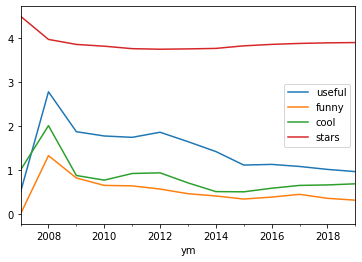

In [ ]:
yelp.groupby('ym').mean().plot()

In [ ]:
# check that you've created it correctly by finding the unique values of ym
# select the ym column and use the .unique() method
yelp['ym'].unique()




<PeriodArray>
['2013', '2016', '2012', '2015', '2014', '2018', '2017', '2009', '2011',
 '2010', '2008', '2019', '2007']
Length: 13, dtype: period[A-DEC]

In [ ]:
# create 'ym' column

yelp['stars'] = yelp.stars.astype(int)



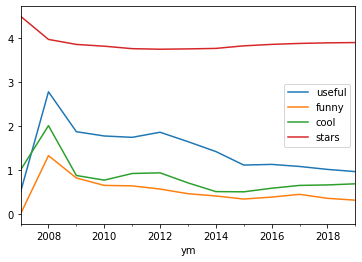

In [ ]:
yelp.groupby('ym').mean().plot()

# Probelm 4 (4 points)

Read in the Quebec **business info** dataset, be sure to use a different variable name for this dataframe.

## Part A questions (2 pts)
1. What is the observational unit of this dataset?
1. On what variable should you merge this (right dataframe) **into** the review data (left dataframe)? 

**Merge business data into the dataframe from Q2.**

Notice a column called "is_open" - if a business has shut down, this column will have a value of 0, otherwise it will have a value of 1.

Construct the line plot where: 
* x-axis is `ym` 
* y-axis is average star rating 
* there are 2 lines: 1. for currently open businesses and 2. closed businesses 
    * Make sure the 2 lines appear on the same figure.
    * You should compute avg. star rating using the `star` variable, not the `biz_star` variable.

## Part B questions (2 pts)
1. Any difference in patterns between these 2 groups of businesses?
1. Speculate on what reason(s) might cause the observed pattern(s).



## Problem 4 Answers (Edit this cell)

### Part A

1. Each row represents one **review**
1. We should merge on **_________**

### Part B

1. (Describe any difference in patterns between currently open and shut down businesses)
1. 2 possible reasons are:
    1. (Clearly explain one hypothesized reason)
    1. (Clearly explain a second hypothesized reason)

In [ ]:
# read in the business info file, call the dataframe biz, e.g. biz = pd.read_csv(...)
biz = pd.read_csv(fpath + 'quebec_biz.csv' , index_col=0)

biz.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,biz_stars,review_count,is_open,attributes,categories,hours
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,NaN,"Pets, Pet Services, Pet Groomers",NaN
31,pcaQDBM6r0PWTXfYZK6RdA,IGA Extra,8130 Boulevard Champlain,Lasalle,QC,H8P 1B4,45.425645,-73.611934,3.0,6,1,"{'BusinessParking': ""{'garage': False, 'street...","Food, Grocery","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
43,LoRef3ChgZKbxUio-sHgQg,Amir,5252 Rue Jean Talon O,Montréal,QC,H4P 2A7,45.494870,-73.651904,3.0,18,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Restaurants, Lebanese, Middle Eastern",NaN
45,_xOeoXfPUQTNlUAhXl32ug,Starbucks,150 Boulevard Crémazie E,Montréal,QC,H2P 1E2,45.542993,-73.640218,3.5,4,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Coffee & Tea, Food","{'Monday': '5:30-23:0', 'Tuesday': '5:30-23:0'..."
57,3BfGGIJn8lxvu1k3ZZnL1w,Théâtre Corona,2490 Rue Notre-Dame O,Montréal,QC,H3J 1N5,45.482777,-73.575006,4.0,18,1,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...","Nightlife, Arts & Entertainment, Performing Ar...",NaN


In [ ]:
yelp.head()

,review_id,user_id,business_id,useful,funny,cool,text,date,stars,ym
0,sybVjriZuCEH09zplkcXAw,qkJtn0Rtz_lKlTs5azBkng,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,AMAZING. Simply amazing. Believe all of the hy...,2013-12-29,5,2013
1,uZ66BJLPMx6mJAY_6bi8vQ,kNL4SpfIdMC8GywGayDEOw,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,Montreal bagels were well worth the experience...,2016-07-14,4,2016
2,uRPUL-YSYuaJZLQp3Z0QlA,dSeYpzf0JkCeARr_CyCh7A,tOhRQqiupLyJdBJVQMGOEQ,1,2,0,"Montreal, what did you do in a previous life t...",2012-06-26,1,2012
3,AGxEC3EtPW1vZH3v2DnPFA,ZhK2xIa4f73JZfua7IP8vA,tOhRQqiupLyJdBJVQMGOEQ,0,0,1,"St-Viateur is better, as bagels and as human b...",2016-02-24,3,2016
4,7rBHa16cZexmPopeVrGKBw,ClJirlfCI0W0CfpYaWdfEw,tOhRQqiupLyJdBJVQMGOEQ,0,1,1,The bagels are good but first they had me writ...,2015-05-26,2,2015


In [ ]:
# Take a look at the first few rows to determine the observational unit

temp = yelp.merge(biz, how = 'left', on = 'business_id')
temp.shape

(208166, 23)

In [ ]:
temp = yelp.merge(biz, how = 'inner', on = 'business_id')
temp.shape

(208166, 23)

In [ ]:
temp = yelp.merge(biz, how = 'outer', on = 'business_id')
temp.shape

(208166, 23)

In [ ]:
temp.shape

(208166, 23)

In [ ]:
# merge the 2 datasets




In [ ]:
yelp.shape

(208166, 10)

In [ ]:
yelp.head()

,review_id,user_id,business_id,useful,funny,cool,text,date,stars,ym
0,sybVjriZuCEH09zplkcXAw,qkJtn0Rtz_lKlTs5azBkng,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,AMAZING. Simply amazing. Believe all of the hy...,2013-12-29,5,2013
1,uZ66BJLPMx6mJAY_6bi8vQ,kNL4SpfIdMC8GywGayDEOw,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,Montreal bagels were well worth the experience...,2016-07-14,4,2016
2,uRPUL-YSYuaJZLQp3Z0QlA,dSeYpzf0JkCeARr_CyCh7A,tOhRQqiupLyJdBJVQMGOEQ,1,2,0,"Montreal, what did you do in a previous life t...",2012-06-26,1,2012
3,AGxEC3EtPW1vZH3v2DnPFA,ZhK2xIa4f73JZfua7IP8vA,tOhRQqiupLyJdBJVQMGOEQ,0,0,1,"St-Viateur is better, as bagels and as human b...",2016-02-24,3,2016
4,7rBHa16cZexmPopeVrGKBw,ClJirlfCI0W0CfpYaWdfEw,tOhRQqiupLyJdBJVQMGOEQ,0,1,1,The bagels are good but first they had me writ...,2015-05-26,2,2015


In [ ]:
temp.head()

,review_id,user_id,business_id,useful,funny,cool,text,date,stars,ym,name,address,city,state,postal_code,latitude,longitude,biz_stars,review_count,is_open,attributes,categories,hours
0,sybVjriZuCEH09zplkcXAw,qkJtn0Rtz_lKlTs5azBkng,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,AMAZING. Simply amazing. Believe all of the hy...,2013-12-29,5,2013,Fairmount Bagel,74 Avenue Fairmount O,Montréal,QC,H2T 2M2,45.522908,-73.595277,4.0,645,1,"{'BusinessParking': ""{'garage': False, 'street...","Bakeries, Food, Bagels","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
1,uZ66BJLPMx6mJAY_6bi8vQ,kNL4SpfIdMC8GywGayDEOw,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,Montreal bagels were well worth the experience...,2016-07-14,4,2016,Fairmount Bagel,74 Avenue Fairmount O,Montréal,QC,H2T 2M2,45.522908,-73.595277,4.0,645,1,"{'BusinessParking': ""{'garage': False, 'street...","Bakeries, Food, Bagels","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
2,uRPUL-YSYuaJZLQp3Z0QlA,dSeYpzf0JkCeARr_CyCh7A,tOhRQqiupLyJdBJVQMGOEQ,1,2,0,"Montreal, what did you do in a previous life t...",2012-06-26,1,2012,Fairmount Bagel,74 Avenue Fairmount O,Montréal,QC,H2T 2M2,45.522908,-73.595277,4.0,645,1,"{'BusinessParking': ""{'garage': False, 'street...","Bakeries, Food, Bagels","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
3,AGxEC3EtPW1vZH3v2DnPFA,ZhK2xIa4f73JZfua7IP8vA,tOhRQqiupLyJdBJVQMGOEQ,0,0,1,"St-Viateur is better, as bagels and as human b...",2016-02-24,3,2016,Fairmount Bagel,74 Avenue Fairmount O,Montréal,QC,H2T 2M2,45.522908,-73.595277,4.0,645,1,"{'BusinessParking': ""{'garage': False, 'street...","Bakeries, Food, Bagels","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
4,7rBHa16cZexmPopeVrGKBw,ClJirlfCI0W0CfpYaWdfEw,tOhRQqiupLyJdBJVQMGOEQ,0,1,1,The bagels are good but first they had me writ...,2015-05-26,2,2015,Fairmount Bagel,74 Avenue Fairmount O,Montréal,QC,H2T 2M2,45.522908,-73.595277,4.0,645,1,"{'BusinessParking': ""{'garage': False, 'street...","Bakeries, Food, Bagels","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


In [ ]:
temp.columns.values

array(['review_id', 'user_id', 'business_id', 'useful', 'funny', 'cool',
       'text', 'date', 'stars', 'ym', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'biz_stars',
       'review_count', 'is_open', 'attributes', 'categories', 'hours'],
      dtype=object)

In [ ]:
# take a look at the columns of the resulting dataframe
# make sure it has all the columns from both the review and business datasets




In [ ]:
# make your plot, use groupby summary and unstack syntax 
# to construct plot, see examples from notes





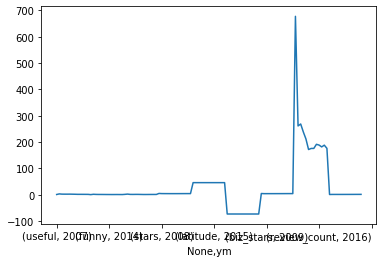

In [ ]:
temp.groupby('ym').mean().unstack().plot()